In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import semopy as sem
import scipy.stats as sts
from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.preprocessing import MinMaxScaler, Normalizer, StandardScaler, OneHotEncoder
from factor_analyzer import FactorAnalyzer

# 1. Factor Analysis Heart CMR Radiomics

Factor analysis (FA) is a modeling technique that explains the covariance in data. In FA, the observed variables are linear combinations of the unobserved variables. In addition, underlying factors are labelable and interpretable. We conducted both Exploratory and Confirmatory Factor Analysis (EFA and CFA) using the Factor Analyzer package for python [1].

In [2]:
# Loading the data
data = pd.read_csv('casuality_data_final_factor_analyzer.csv')
data.shape

(2065, 1428)

In [3]:
#filtering heart CMR radiomics
heart_df = data.filter(regex='heart')
cardio_cmr_df = data.filter(regex='cardio_cmr')
heart_df = pd.concat([heart_df, cardio_cmr_df], axis=1)
heart_df.shape

(2065, 639)

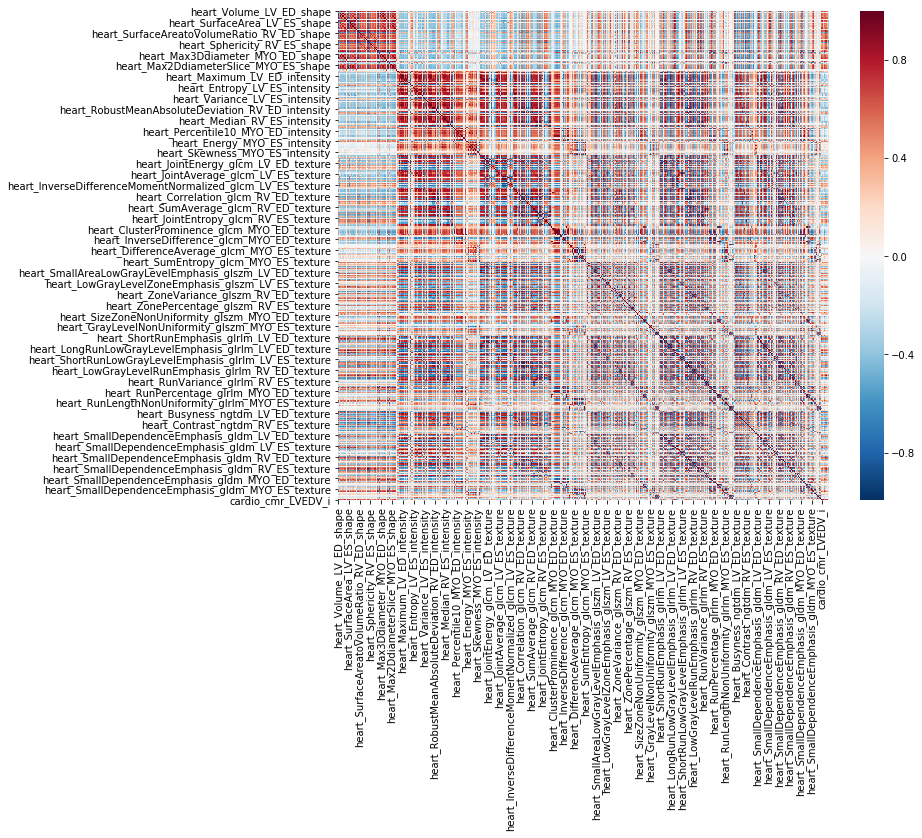

In [4]:
# Correlation heatmap
heart_corr = heart_df.corr()
plt.figure(figsize=(11,9))
sns.heatmap(heart_corr, cmap=plt.cm.RdBu_r)
plt.show()

In [5]:
# Data normalization
scaler = MinMaxScaler()
data_scaled_heart = scaler.fit_transform(heart_df)

To measure the suitability of FA, two different tests were run: KMO Test and Bartlett’s Test.

Kaiser-Meyer-Olkin (KMO) Test measures the suitability of data for factor analysis. It determines the adequacy for each observed variable and for the complete model. It estimates the proportion of variance among all the observed variables. Lower
proportion is more suitable for factor analysis. KMO values range between 0 and 1, and if the value is less than 0.6 is considered inadequate.

In [6]:
# KMO test
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model = calculate_kmo(data_scaled_heart)

C:\Users\Alejandro\Downloads\ANACONDA\lib\site-packages\factor_analyzer\utils.py:248: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn('The inverse of the variance-covariance matrix '


In [7]:
kmo_model

0.9781077779373756

Bartlett’s test of sphericity checks whether or not the observed variables intercorrelate at all using the observed correlation matrix against the identity matrix. If the test
found statistically insignificant, FA should not be employed. On the contrary, if the
p-value is close to 0 the test was statistically significant, indicating that the observed
correlation matrix is not an identity matrix

In [8]:
# Bartlett's test
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value, p_value = calculate_bartlett_sphericity(data_scaled_heart)
chi_square_value, p_value

C:\Users\Alejandro\Downloads\ANACONDA\lib\site-packages\factor_analyzer\factor_analyzer.py:118: RuntimeWarning: divide by zero encountered in log
  statistic = -np.log(corr_det) * (n - 1 - (2 * p + 5) / 6)
C:\Users\Alejandro\Downloads\ANACONDA\lib\site-packages\scipy\stats\_continuous_distns.py:1073: RuntimeWarning: invalid value encountered in subtract
  return sc.xlogy(df/2.-1, x) - x/2. - sc.gammaln(df/2.) - (np.log(2)*df)/2.


(inf, nan)

KMO test result and the Bartlett’s test of sphericity are considered adecuate and statistically significant.  Therefore, securing the suitability of the data being used to extract this latent factor for FA.

In [9]:
# Create factor analysis object and perform factor analysis
fa_heart = FactorAnalyzer(n_factors=1, rotation = None)
fa_heart.fit(data_scaled_heart)

FactorAnalyzer(n_factors=1, rotation=None, rotation_kwargs={})

Eigenvalues represent variance explained each factor from the total variance. It is also known as characteristic roots.

In [10]:
# Check Eigenvalues
ev, v = fa_heart.get_eigenvalues()
ev

array([ 2.51936067e+02,  7.23165883e+01,  3.90266234e+01,  2.74638832e+01,
        1.78757789e+01,  1.62127650e+01,  1.26114959e+01,  1.16555975e+01,
        1.04624564e+01,  1.01788526e+01,  8.94346643e+00,  8.49521013e+00,
        7.34845669e+00,  7.01224680e+00,  6.80314778e+00,  5.79904244e+00,
        5.24367332e+00,  5.13646290e+00,  4.89662799e+00,  4.27347854e+00,
        4.17057309e+00,  3.81397011e+00,  3.63151724e+00,  3.36891940e+00,
        3.26454690e+00,  3.02205643e+00,  2.91543432e+00,  2.87846658e+00,
        2.56249282e+00,  2.51310315e+00,  2.41554358e+00,  2.34057770e+00,
        2.10247130e+00,  2.04380192e+00,  1.95258388e+00,  1.90813612e+00,
        1.79300798e+00,  1.78601732e+00,  1.71640763e+00,  1.63520506e+00,
        1.55459022e+00,  1.45076323e+00,  1.40211047e+00,  1.34871006e+00,
        1.29460182e+00,  1.21515551e+00,  1.14203498e+00,  1.10869554e+00,
        1.07434768e+00,  1.06000898e+00,  1.01736428e+00,  1.00122163e+00,
        9.57022031e-01,  

Kaiser criterion is an analytical approach, which is based on the more significant proportion of variance explained by factor will be selected. The eigenvalue is a good criterion for determining the number of factors. Generally, an eigenvalue greater than 1 will be considered as selection criteria for the feature. The graphical approach is based on the visual representation of factors' eigenvalues also called scree plot. This scree plot helps us to determine the number of factors where the curve makes an elbow.

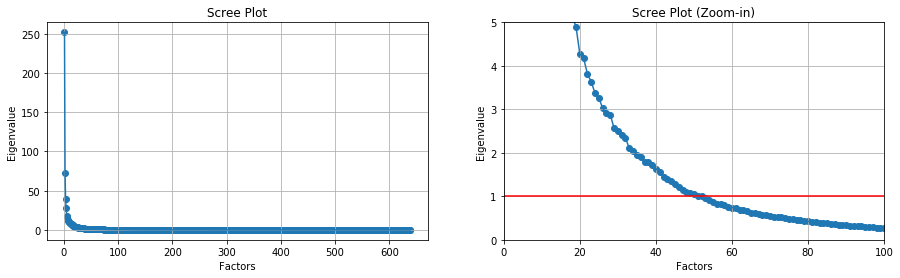

In [11]:
# Scree plot
fig = plt.figure(figsize=(15,4))
fig.add_subplot(121)
plt.scatter(range(1,data_scaled_heart.shape[1]+1),ev)
plt.plot(range(1,data_scaled_heart.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
fig.add_subplot(122)
plt.scatter(range(1,data_scaled_heart.shape[1]+1),ev)
plt.plot(range(1,data_scaled_heart.shape[1]+1),ev)
plt.xlim(0,100)
plt.ylim(0,5)
plt.axhline(1,color='r')
plt.title('Scree Plot (Zoom-in)')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

The factor loading is a matrix which shows the relationship of each variable to the underlying factor. It also shows the correlation coefficient for the observed variables and the factor, and the variance explained by the observed variables.

In [39]:
heart_loadings = pd.DataFrame(fa_heart.loadings_, index=heart_df.columns)
heart_loadings.columns = ['Loadings']
heart_loadings.sort_values(by = 'Loadings', axis = 0, ascending=False)[:10]

,Loadings
heart_InverseDifference_glcm_RV_ES_texture,0.891137
heart_InverseDifferenceMoment_glcm_RV_ES_texture,0.889092
heart_InverseDifference_glcm_RV_ED_texture,0.880894
heart_InverseDifferenceMoment_glcm_RV_ED_texture,0.880765
heart_GrayLevelNonUniformityNormalized_glrlm_RV_ES_texture,0.871713
heart_LargeDependenceLowGrayLevelEmphasis_gldm_RV_ED_texture,0.867649
heart_GrayLevelNonUniformityNormalized_glrlm_LV_ES_texture,0.866858
heart_GrayLevelNonUniformityNormalized_glrlm_RV_ED_texture,0.858650
heart_InverseDifference_glcm_LV_ES_texture,0.858577
heart_LargeDependenceLowGrayLevelEmphasis_gldm_LV_ED_texture,0.856550


Commonalities are the sum of the squared loadings for each variable. It represents the common variance. It ranges from 0-1 and value close to 1 represents more variance.

In [40]:
heart_commu = pd.DataFrame(fa_heart.get_communalities(), columns= ['Communality'], index= heart_df.columns)
heart_commu.sort_values(by=['Communality'], ascending=False )[:10]

,Communality
heart_Percentile90_LV_ED_intensity,0.888759
heart_Percentile90_RV_ED_intensity,0.878883
heart_RootMeanSquared_LV_ED_intensity,0.867724
heart_Mean_LV_ED_intensity,0.853912
heart_Percentile90_LV_ES_intensity,0.853376
heart_RootMeanSquared_RV_ED_intensity,0.848556
heart_JointEntropy_glcm_LV_ES_texture,0.843572
heart_Median_LV_ED_intensity,0.837688
heart_Mean_RV_ED_intensity,0.833981
heart_DifferenceEntropy_glcm_RV_ES_texture,0.830359


In [45]:
g_heart = fa_heart.transform(heart_df)
g_heart.shape

(2065, 1)

In [47]:
data['g_heart'] = g_heart
min(data['g_heart']), max(data['g_heart'])

(-609277896202873.6, 9368205242487.057)

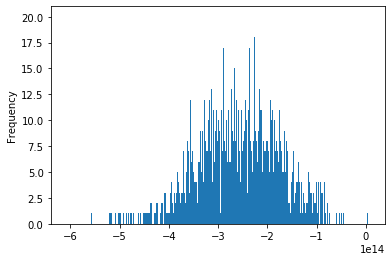

In [49]:
bin_values = np.arange(start=-609277896202873.6, stop=9368205242487.057, step=1000000000000)
data['g_heart'].plot(kind='hist', bins=bin_values)

# 2. References

[1]: [Navlani, A. (2019)](https://www.datacamp.com/community/tutorials/introduction-factor-analysis). Introduction to Factor Analysis in Python